# Overall

```
- 프로젝트명 : 마트 수요/매출 예측
- 프로젝트유형 : 데이터 EDA 및 Regression(회귀) 예측
```

```
- 시나리오 : 공공 데이터와 쉽게 구할 수 있는 데이터를 활용하여 주간 마트 판매량 예측 통해 인력운영 효율 도모
- 문제정의 : 인력운영 비효율로 인한 운영 비용 상승
- 기대효과 : 인력운영 효율화로 인한 운영 비용 절감
- 해결방안 : 주간 판매량 예측을 통해 인력 운영 스케줄 조정
- 성과측정 : 주간 판매량 예측량에 따른 스케줄 조정 후 운영 비용 모니터링
- 운영방향 :
    - 1주가 종료되면 차주 판매량을 예측하기 위한 공공데이터 및 내부 데이터 수집
    - Data를 Model에 Input후 주간 판매량 추출
    - 주간 판매량에 따라 인력 운영 계획 수립
```

```
- 분석결과
	- 상관계수 분석 :
		- 매출과 양의 상관성 보인 지표 : CPI > Fuel_Price
		- 매출과 음의 상관성 보인 지표 : Temperature > Unemployment
	- 머신러닝 분석 :
		- 매출에 상관성을 보이는 지표 : Temperature > Fuel_Price > Unemployment > Holiday_Flag

- 제안
	- 인력 배치 효율화를 위해서는, 주간 매출과 유의한 상관성을 보인 Temperature의 변화를 우선적으로 검토 제안
		- 분석 과정에서 영향력 있는 지표로서 확인되었음을 감안
	- 다만, 매출에 영향을 줄 수 있는 요인은 다수, 현재 주어진 데이터 만으로는 정확한 예측 또는 판단이 제한
        - 1차 제안 지표를 바탕으로 인력 효율 과정에서 실제 운영 비용의 추이를 파악하여, 유의미성 관찰을 제안
		- 그 외 새로운 feature 파악 통해 영향도 높은 요인 파악 요구됨

```


```
- Meta data
    - Store : 점포 번호  
    - Date : 날짜  
    - Weekly_Sales : 주간 매출  
    - Holiday_Flag : 공휴일 여부 (1: 공휴일, 0: 평일)  
    - Temperature : 기온 (화씨)  
    - Fuel_Price : 연료 가격 (갤런당 달러)  
    - CPI : 소비자물가지수  
    - Unemployment : 실업률  

```


# Library

In [133]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background']) # 색상 변경

# 과학표기법을 숫자로 변경하는 과정
pd.options.display.float_format = '{:.2f}'.format



# Data Import

In [47]:
df = pd.read_csv('S_PJT01_DATA.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Preprocessing


<Axes: >

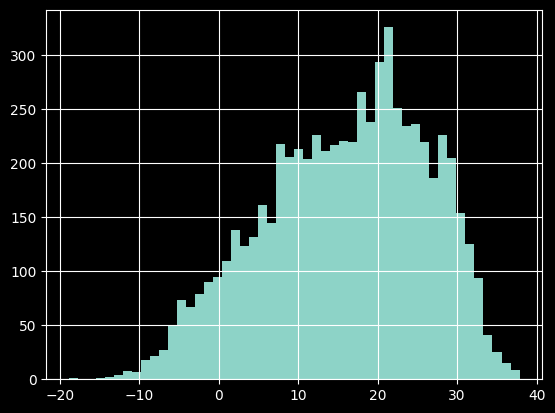

In [48]:
# Temperature > Farenheit to Celsius
df['Temperature'] = (df['Temperature'] - 32) * 5/9
df['Temperature'].hist(bins = 50)

In [49]:
# Date : object to datetime
# dt 모듈의 strftime 으로 yyyy-mm-dd 형식으로 한 번 더 조정
# 이후 to_datetime() 통해서 다시 datetime 형변환
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y').dt.strftime('%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106


# EDA

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,15.924324,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,10.247185,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-18.922222,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,8.588889,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,17.038889,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,23.855556,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,37.855556,4.468000,227.232807,14.313000


In [51]:
df.isna().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


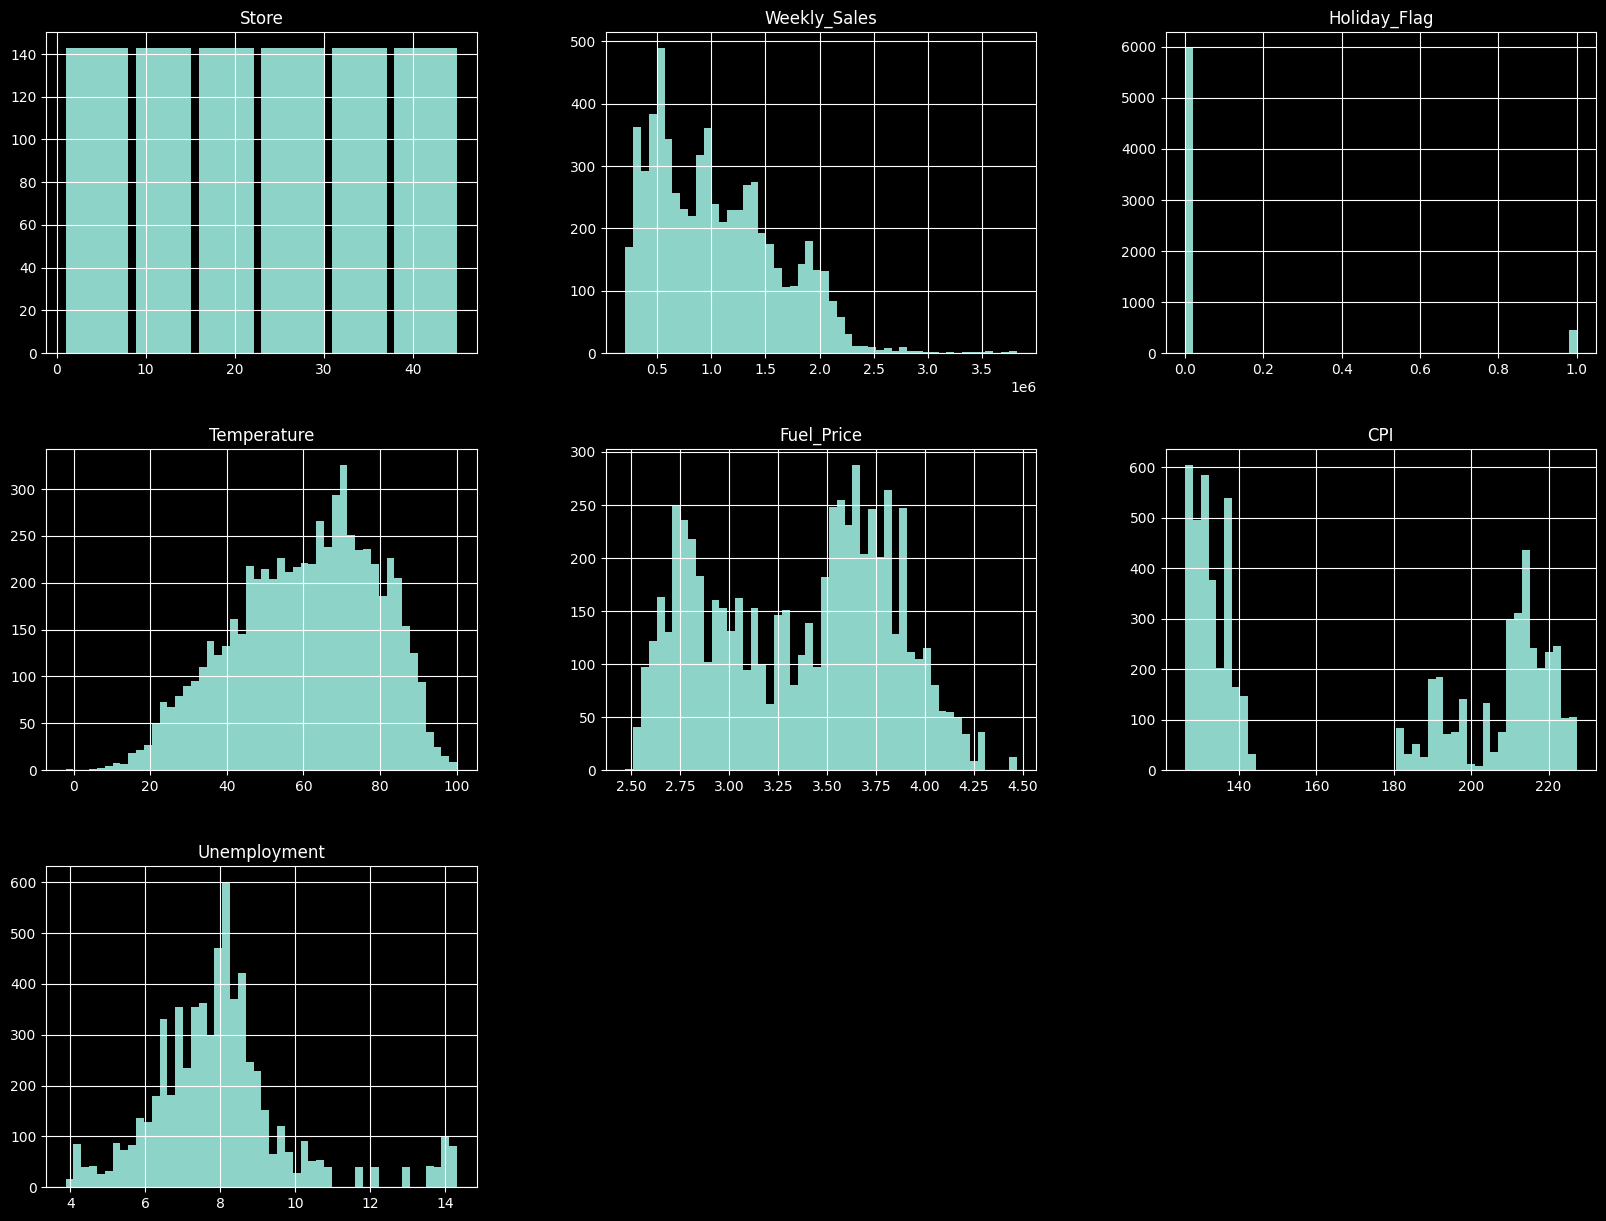

In [23]:
df.hist(bins = 50, figsize = (20, 15))
plt.show();

In [ ]:
# 각 store 별 날짜가 동일한가
# 각 store 별 동일한 날짜별 데이터를 가짐
(df.groupby(['Store', 'Date'])['Weekly_Sales'].count().unstack(level = -1) > 1).sum().sum()

np.int64(0)

In [82]:
df[['Store', 'Date']].reset_index(drop = True).groupby('Date').count()

,Store
Date,
2010-02-05,45
2010-02-12,45
2010-02-19,45
2010-02-26,45
2010-03-05,45
...,...
2012-09-28,45
2012-10-05,45
2012-10-12,45


In [84]:
# 기간은 언제부터 언제까지 있는가
df['Date'].describe()

,Date
count,6435
mean,2011-06-17 00:00:00
min,2010-02-05 00:00:00
25%,2010-10-08 00:00:00
50%,2011-06-17 00:00:00
75%,2012-02-24 00:00:00
max,2012-10-26 00:00:00


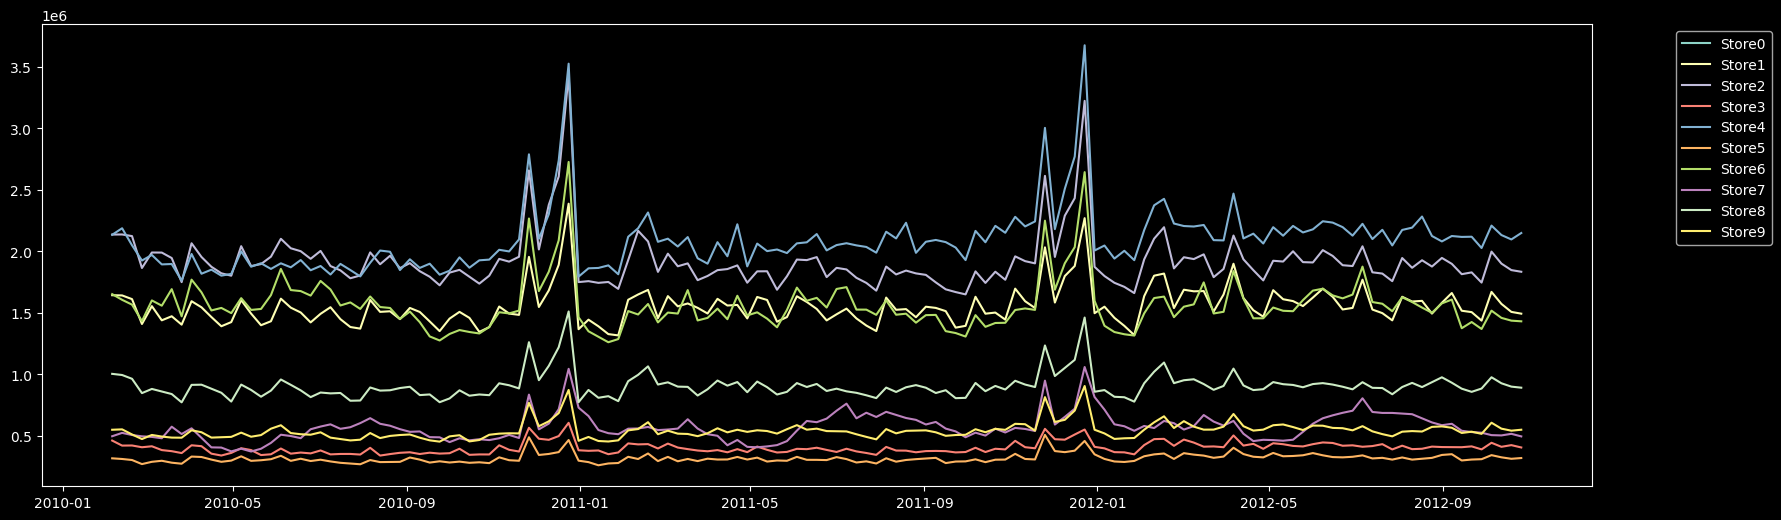

In [86]:
# 전체에서 10개 store sample data 로 Weekly Sales 수준을 파악
# 스케일이 서로 다르나 유사한 trend를 보이는 점을 파악
# len(df['Store'].unique())

plt.figure(figsize = (20, 6))

for i in range(10) :
    df_tmp = df[df['Store']==i].sort_values(by=['Date'])
    plt.plot(df_tmp['Date'], df_tmp['Weekly_Sales'], label=f'Store{i}');

plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

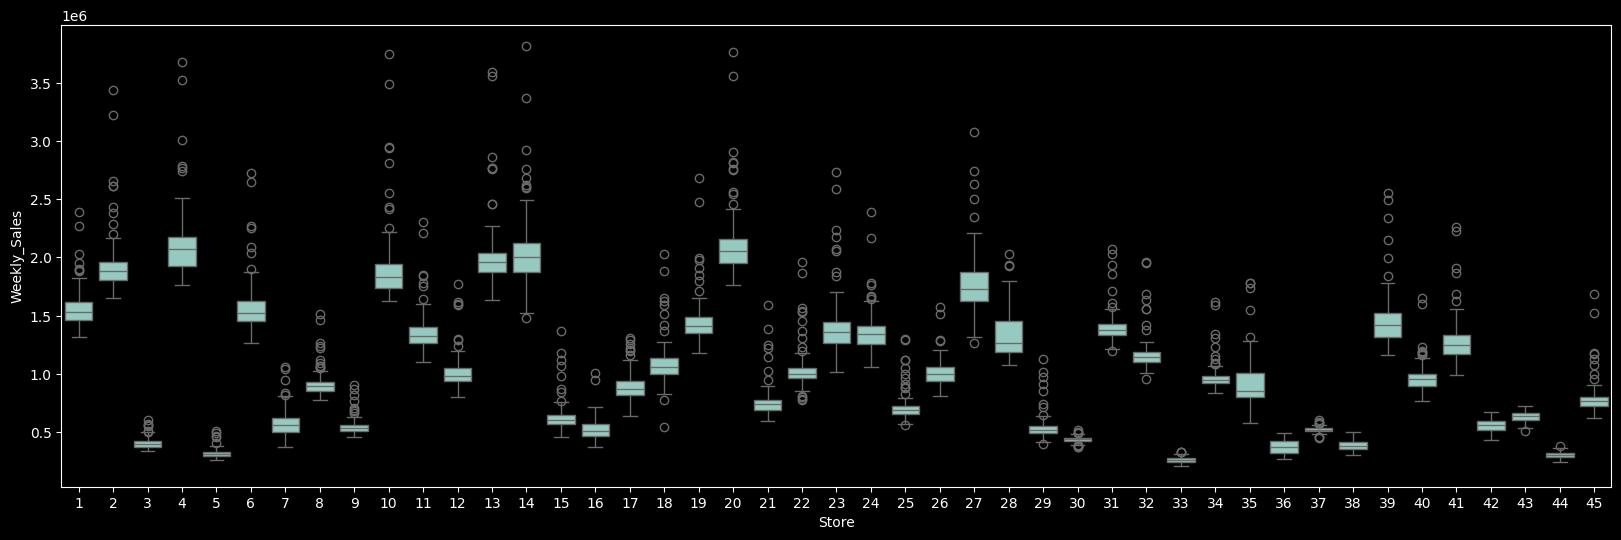

In [90]:
plt.figure(figsize = (20,6))
sns.boxplot(data = df, x = 'Store', y = 'Weekly_Sales')
plt.show()

# 상관분석

## Line plot
- 유의미한 패턴 파악 다소 제한

In [ ]:
# columns array 형태를 list 형식으로 변경
df.columns.tolist()[2:]


['Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [101]:
df1 = df[df['Store'] == 1]

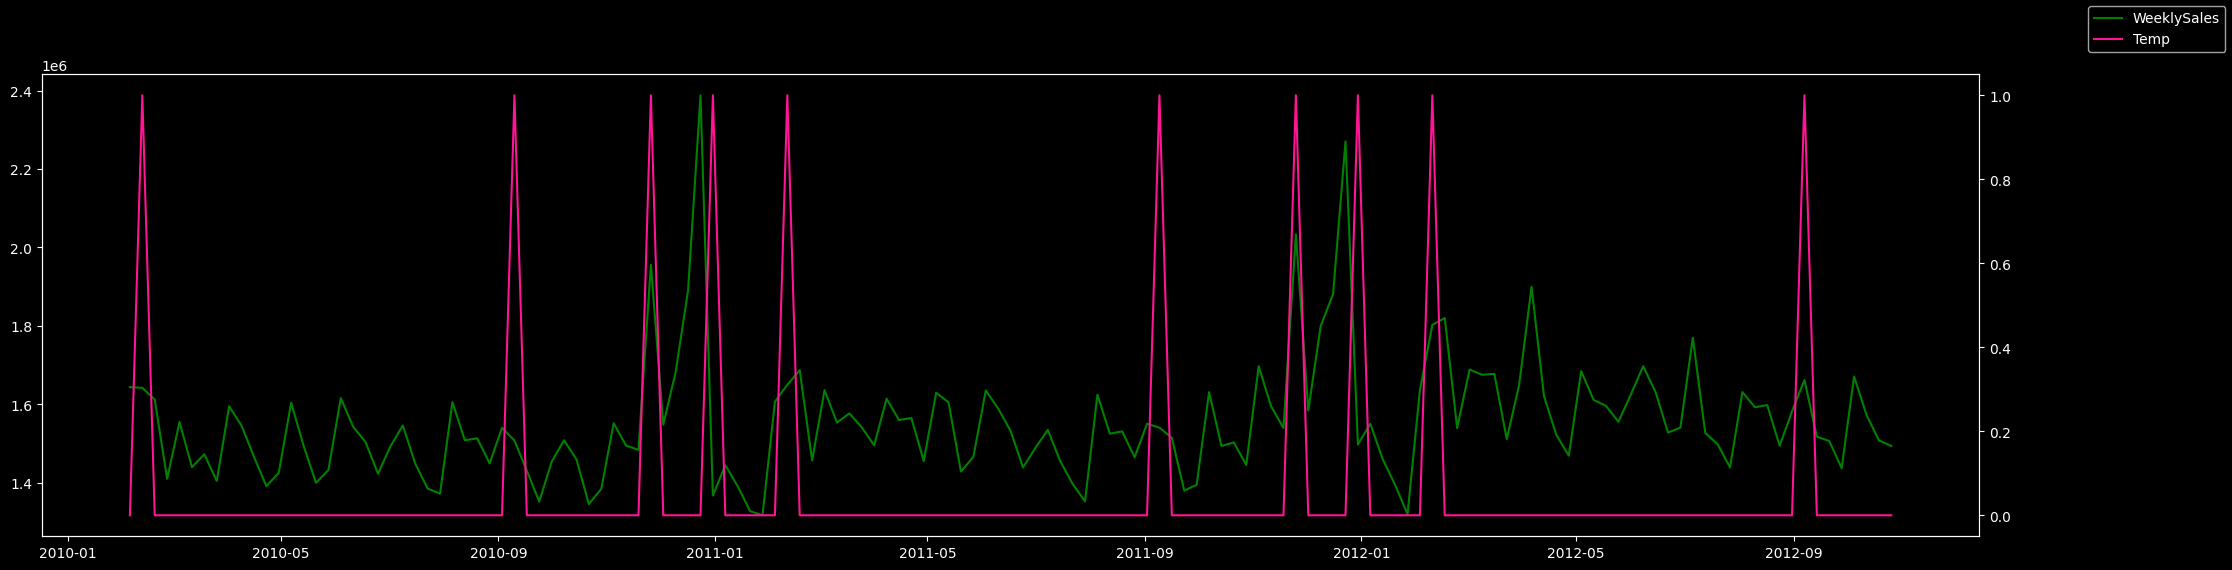

In [109]:
# Holiday_Flag
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Holiday_Flag'], color='deeppink', label='Temp')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()


In [ ]:
# 연휴 유무 간 높은 차이를 가지지는 않는 점을 확인하였습니다.
df1.groupby('Holiday_Flag')['Weekly_Sales'].mean().apply('{:.2f}'.format)

,Weekly_Sales
Holiday_Flag,
0,1546957.39
1,1665747.66


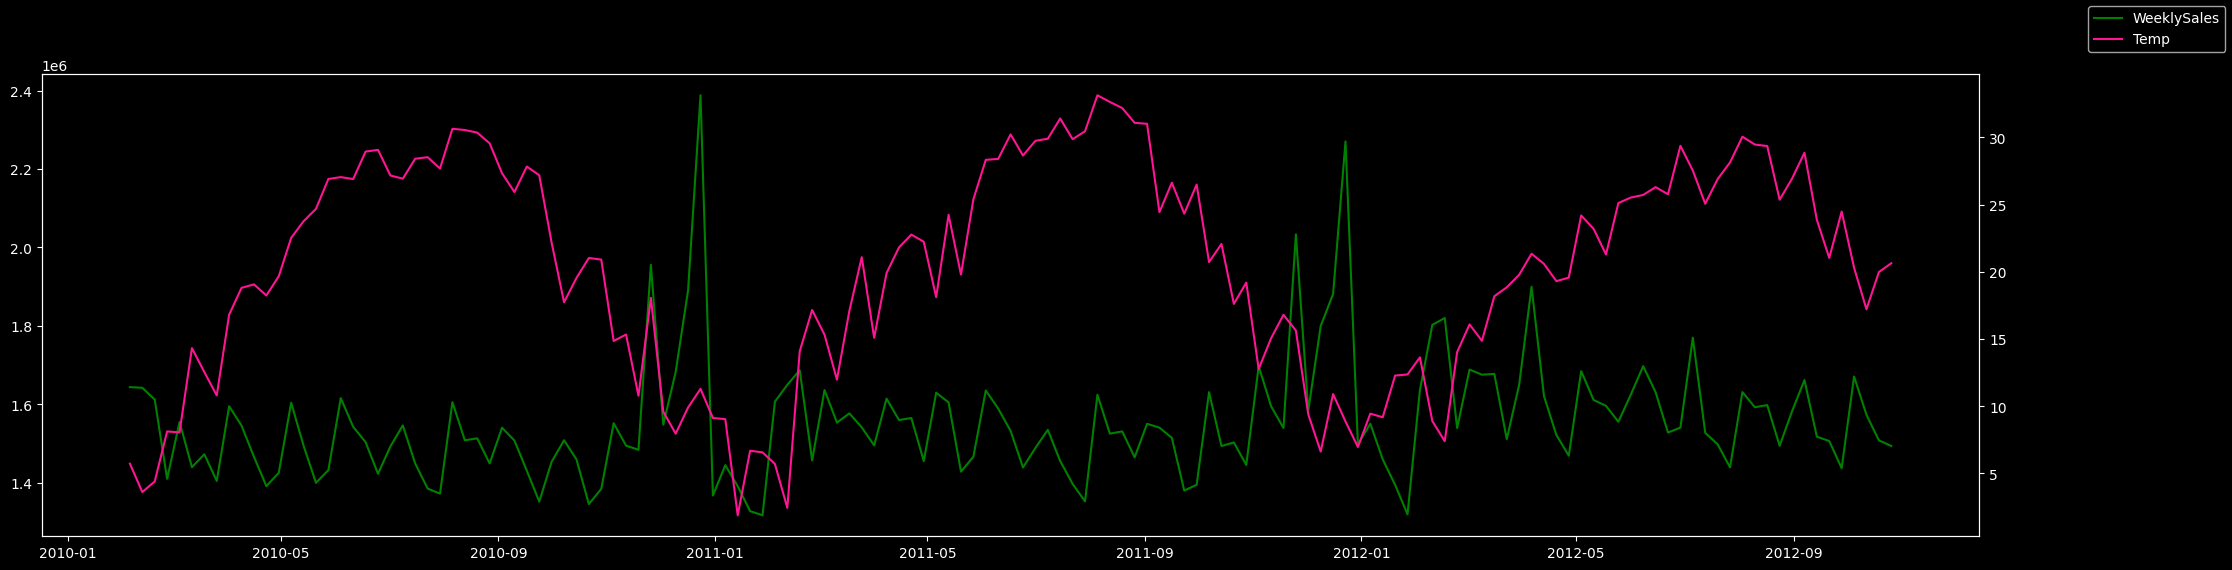

In [ ]:
# Temperature
# 온도에서는 2011-01, 2012-01 기간에서 패턴의 유사성을 발견할 수 있었습니다.
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Temperature'], color='deeppink', label='Temp')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()


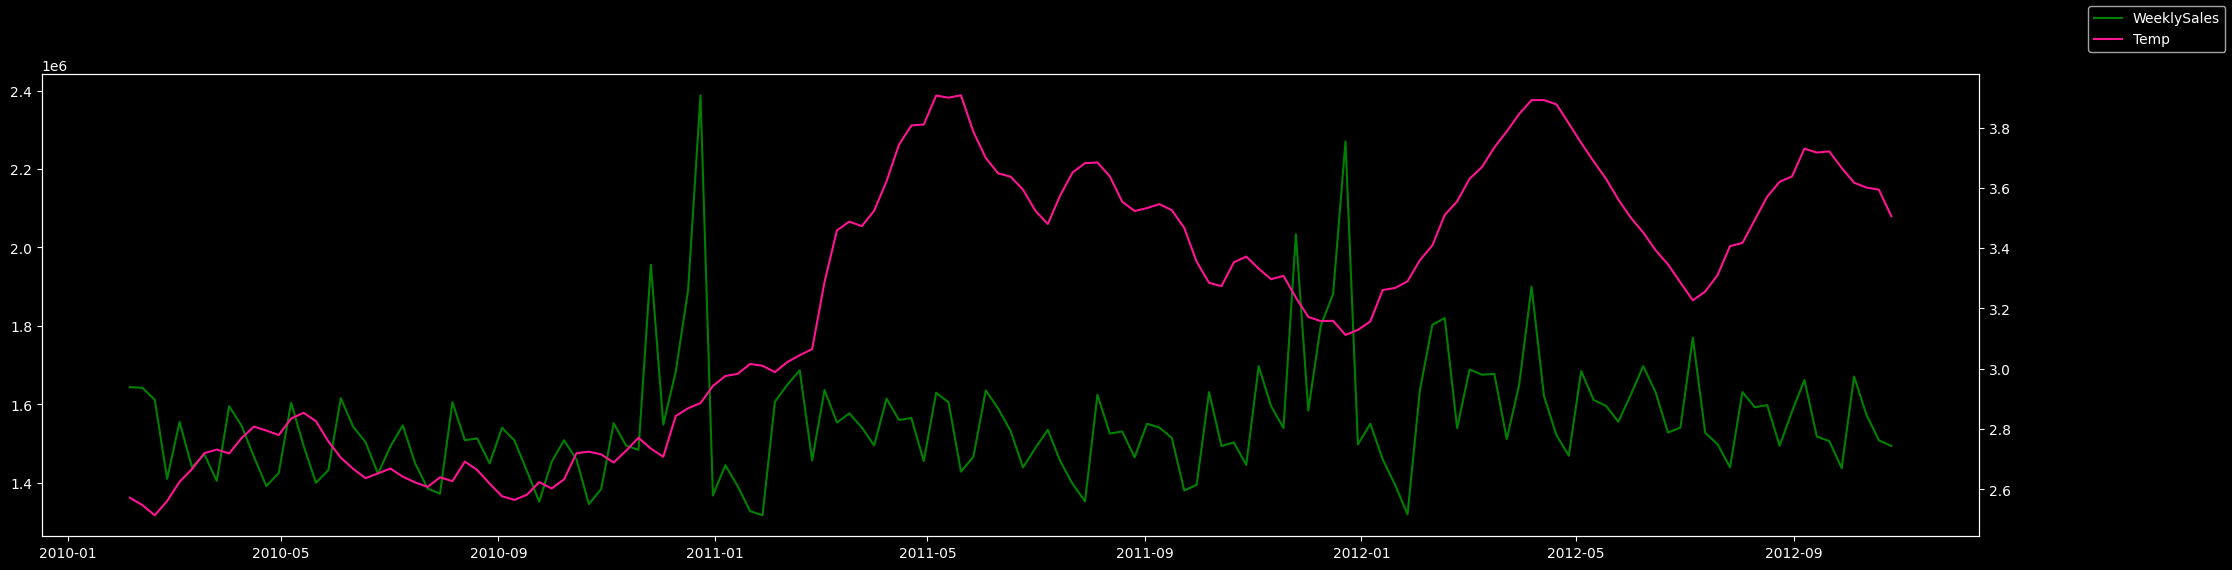

In [ ]:
# Fuel_Price
# Fuel Price 에서는 패턴의 유사성을 발견하지 못했습니다.
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Fuel_Price'], color='deeppink', label='Temp')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()


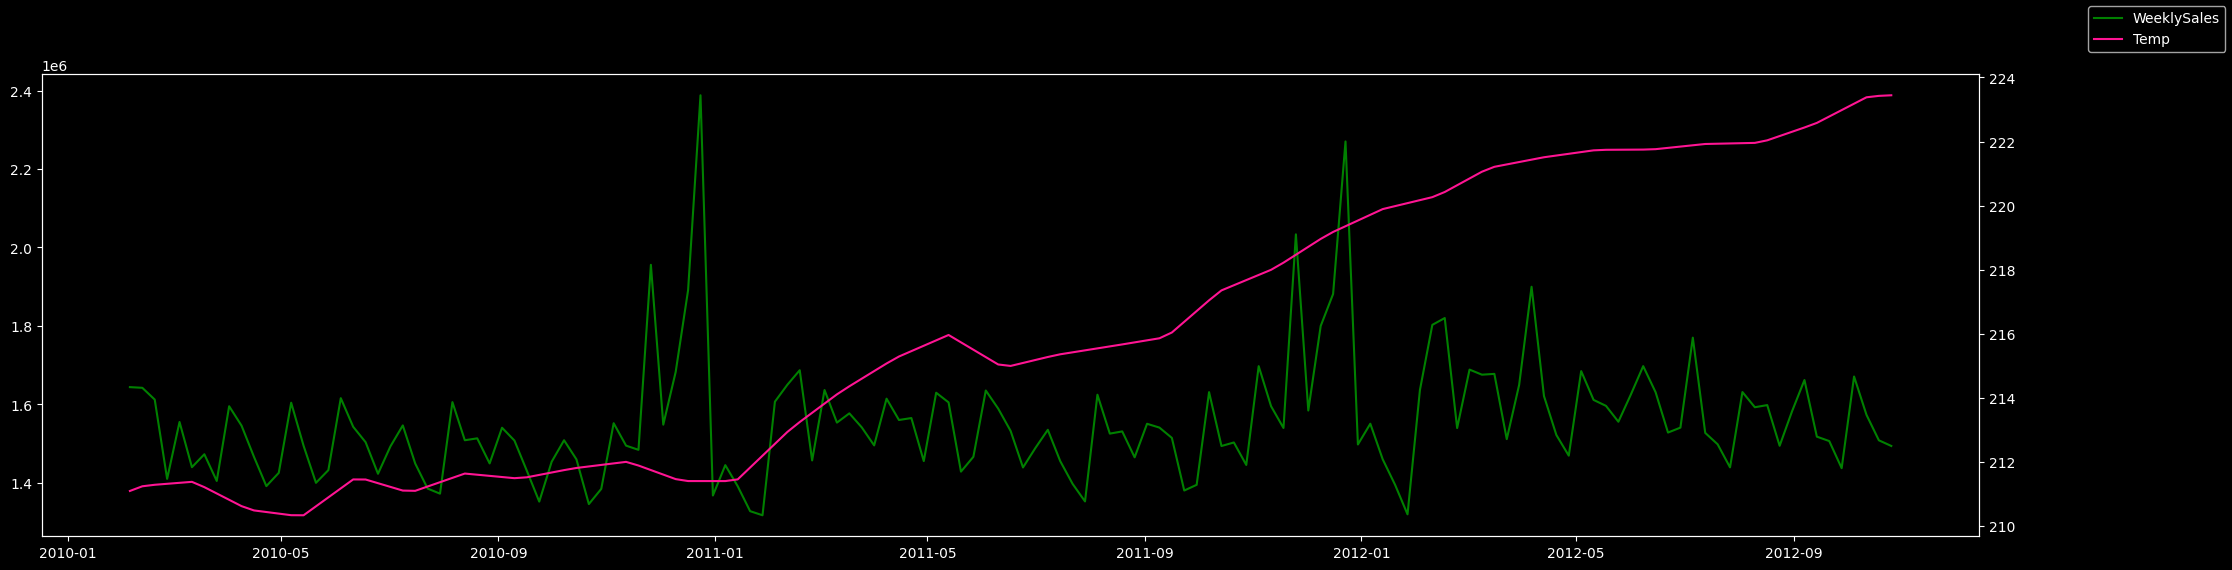

In [ ]:
# CPI
# CPI 에서는 패턴의 유사성을 발견하지 못했습니다.

fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['CPI'], color='deeppink', label='Temp')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()


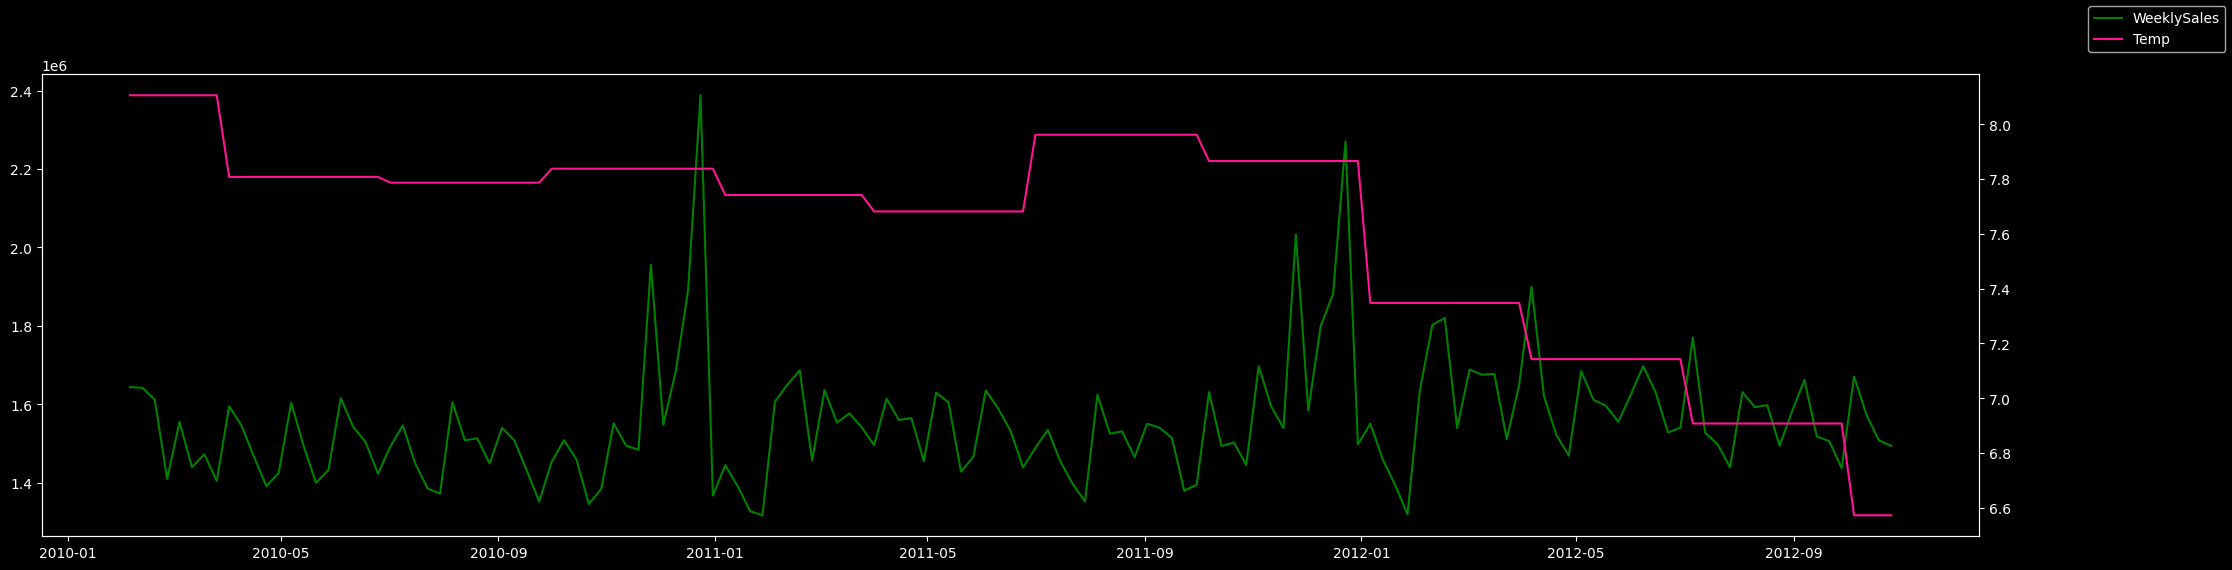

In [ ]:
# Unemployment
# 실업률에서도 유사한 패턴을 발견하지 못하였습니다.
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Unemployment'], color='deeppink', label='Temp')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

## Correlation (Heatmap)

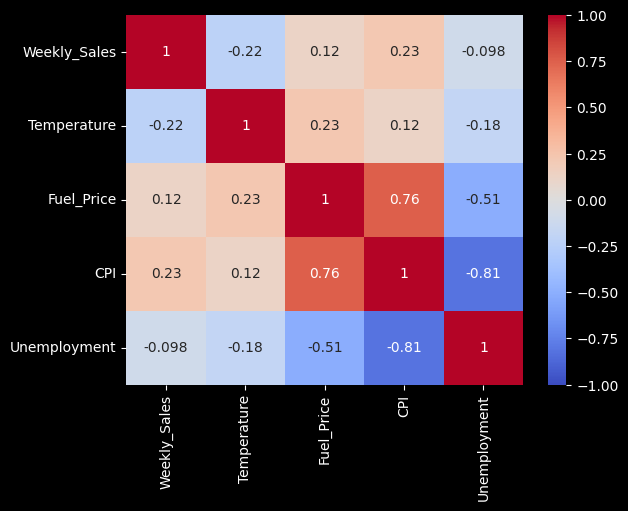

In [ ]:
# 양의 상관성을 보이는 CPI, Fuel Price
# 음의 상관성을 보이는 Temperature, Unemployment
# 양/음 상관성을 보이는 feature를 발견할 수 있었습니다.
df1_corr = df1.drop(['Store', 'Holiday_Flag', 'Date'], axis=1).corr()
sns.heatmap(data = df1_corr, vmax = 1, vmin = -1, annot = True, cmap = 'coolwarm')
plt.show()

## Scatterplot
- 상관관계를 보였던 변수 간 산점도로 확인 시 유의미한 패턴 확인이 어려웠습니다

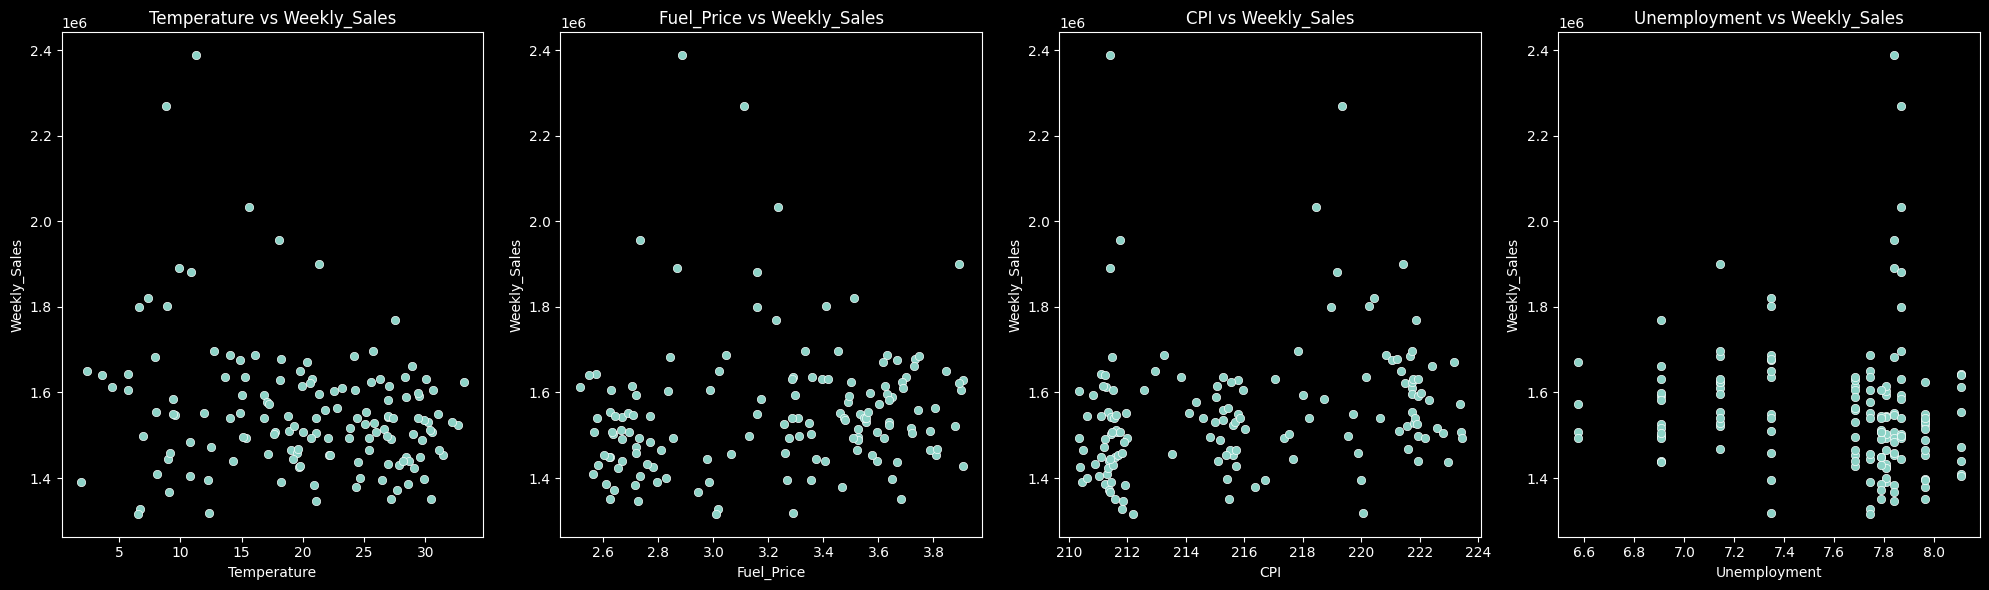

In [121]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 6))

# X축 변수 리스트
x_vars = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for i, x_var in enumerate(x_vars):
    sns.scatterplot(x=x_var, y='Weekly_Sales', data=df1, ax=axes[i])
    axes[i].set_title(f'{x_var} vs Weekly_Sales')

plt.tight_layout()
plt.show()

- Weekly Sales에 영향 주는 주요 변수 파악 제한 감안, 모든 변수를 유지하여 머신러닝 기법을 통해 추가 분석을 진행합니다.

# ML : 구매액 예측 모델링

## RandomForestRegressor

In [122]:
# 월과 요일을 추출하여 새롤운 파생 변수로 활용
df1['Dayofweek'] = df1['Date'].dt.dayofweek
df1['month'] = df1['Date'].dt.month
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Dayofweek,month
0,1,2010-02-05,1643690.90,0,5.727778,2.572,211.096358,8.106,4,2
1,1,2010-02-12,1641957.44,1,3.616667,2.548,211.242170,8.106,4,2
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,4,2
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,4,2
4,1,2010-03-05,1554806.68,0,8.055556,2.625,211.350143,8.106,4,3


In [132]:
# Feature(X)와 Y데이터를 구분하는 단계
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Store, Date, Y, 소비자물가지수 drop
X=df1.drop(['Store', 'Date', 'Weekly_Sales', 'CPI'], axis=1)
Y=df1['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

## 랜덤포래스트회귀모델
rfr = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=42)
rfr.fit(x_train, y_train)



## test set에서의 mae 값이 더 커지므로, 모델이 train 데이터에 의해 과적합 가능성이 있으며
## r2 score는 test 데이터 셋에서 평균값인 0 보다도 더 낮은 값을 가지며 이는 모델의 성능이 다소 낮음을 의미

# 예측은 학습에 사용된 Data와 Test Data 모두 예측하고 평가함(※ 과적합 여부 판별)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# 훈련 데이터에 대한 예측값 생성
y_pred_train = rfr.predict(x_train)

# 테스트 데이터에 대한 예측값 생성
y_pred_test = rfr.predict(x_test)

# 훈련 데이터의 MAE (Mean Absolute Error): 예측값과 실제값의 절대 오차 평균
mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)

# 훈련 데이터의 R² Score (결정계수): 모델이 실제값을 얼마나 잘 설명하는지를 나타내는 지표 (1에 가까울수록 좋음)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')

# 테스트 데이터의 MAE
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)

# 테스트 데이터의 R² Score
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

(85, 4)
(85,)
(58, 4)
(58,)
mae_train(mae):  65525.31364982162
r2_score(r2):  0.6449873901397833

mae_test(mae):  109862.35450492855
r2_score(r2):  -0.011426133105449487


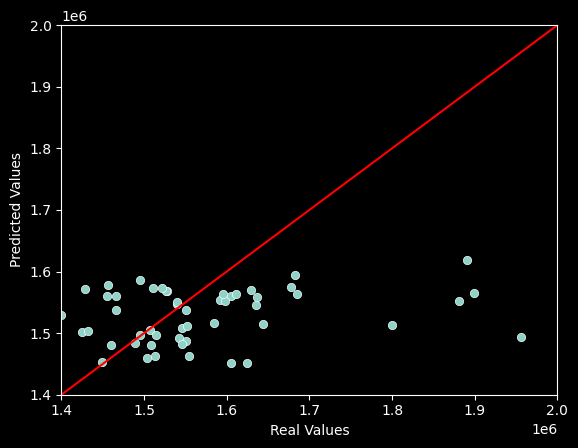

In [138]:
# 예측모델을 통해서도 실제값과 많은 차이가 나는 것을 확인하였습니다.

result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']

sns.scatterplot( x = result['Real Values'], y = result['Predicted Values'])
plt.xlim(1400000, 2000000)
plt.ylim(1400000, 2000000)

x = [1400000, 2000000]
y = [1400000, 2000000]
plt.plot(x, y, color='red')
plt.show()

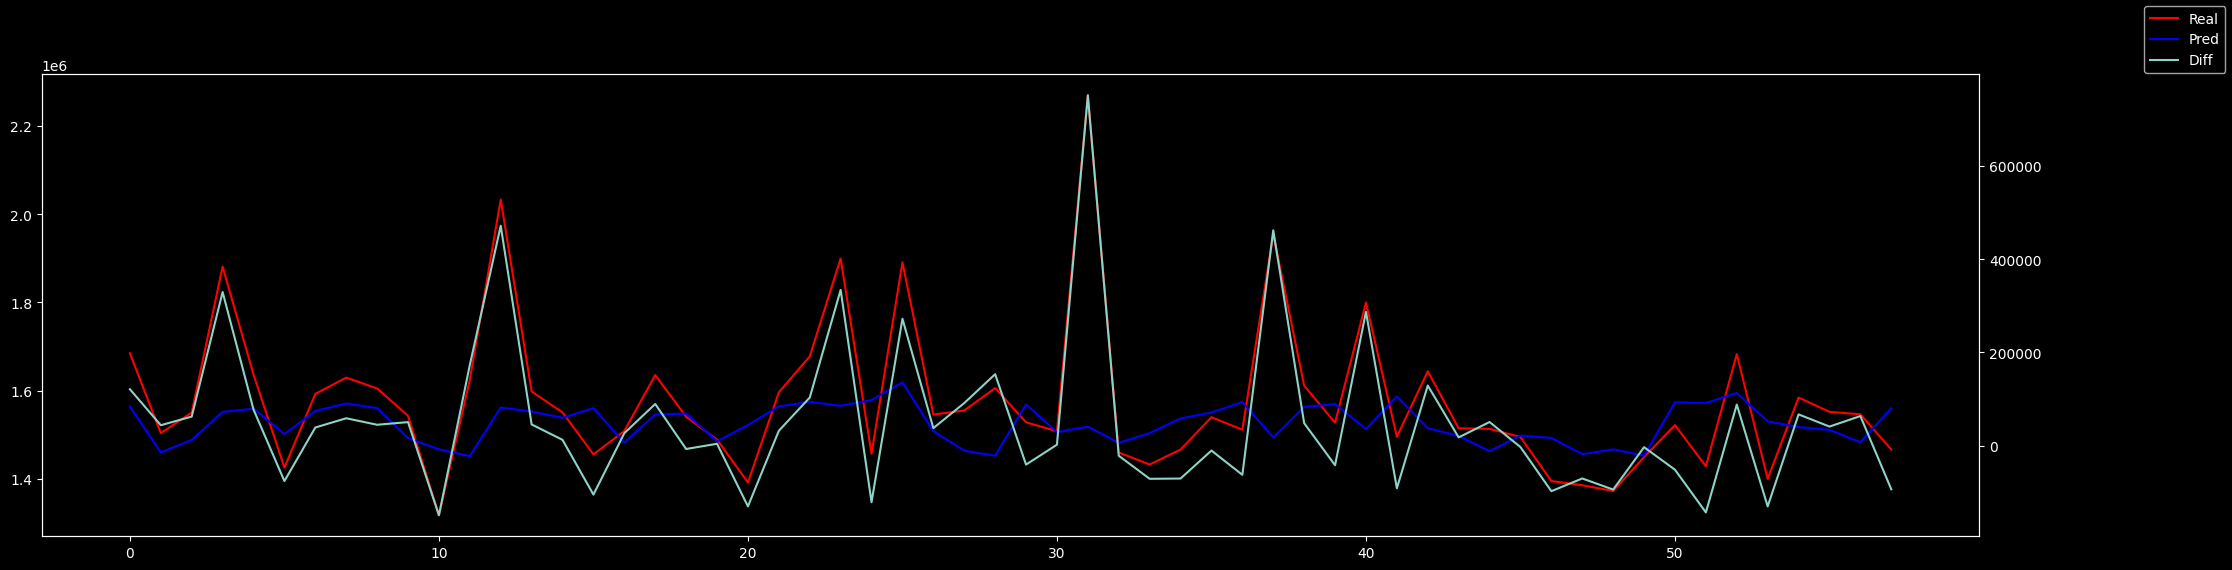

In [148]:
# week sales가 peak를 치는 곳에서 모델의 예측력이 많이 저하되는 양상을 보였습니다.
result = result.reset_index(drop=True)

fig, ax1 = plt.subplots()

plt.plot(result.index, result['Real Values'], color = 'red', label='Real');
plt.plot(result.index, result['Predicted Values'], color = 'blue', label='Pred')

ax2 = ax1.twinx()
ax2.plot(result.index, result['diff'], label='Diff');

fig.legend()
plt.gcf().set_size_inches(25, 6)

## Feature Importance

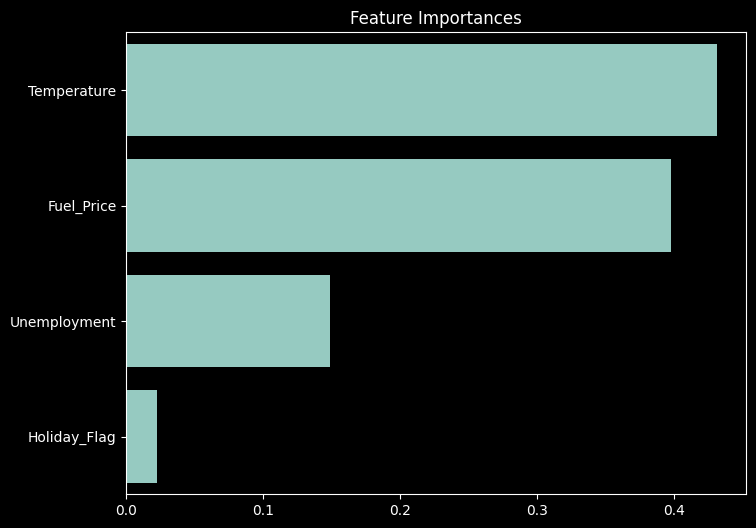

In [153]:
## Week Sales 예측에 활용되는 주요 feature 로는 Temperature > Fuel_price > Unemployement > Holiday Flag 로 나타났습니다.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.xlabel('')
plt.ylabel('')
plt.show()